# 线性回归

## 目录

- 线性代数
- 上海房价预测问题
- 线性回归的从零开始实现
- 线性回归的简洁实现

## 线性代数

标量由只有一个元素的张量表示

In [1]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

你可以将向量视为标量值组成的列表

In [2]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

通过张量的索引来访问任一元素

In [3]:
x[3]

tensor(3)

访问张量的长度

In [4]:
len(x)

4

只有一个轴的张量，形状只有一个元素

In [5]:
x.shape

torch.Size([4])

通过指定两个分量$m$和$n$来创建一个形状为$m \times n$的矩阵

In [6]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

矩阵的转置

In [7]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

*对称矩阵*（symmetric matrix）$\mathbf{A}$等于其转置：$\mathbf{A} = \mathbf{A}^\top$

In [8]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [9]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

就像向量是标量的推广，矩阵是向量的推广一样，我们可以构建具有更多轴的数据结构

In [10]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

给定具有相同形状的任意两个张量，任何按元素二元运算的结果都将是相同形状的张量

In [11]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

两个矩阵的按元素乘法称为*Hadamard积*（Hadamard product）（数学符号$\odot$）

In [12]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [13]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

计算其元素的和

In [14]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

表示任意形状张量的元素和

In [15]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

指定张量沿哪一个轴来通过求和降低维度

In [16]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [17]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [18]:
A.sum(axis=[0, 1])

tensor(190.)

一个与求和相关的量是*平均值*（mean或average）

In [19]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [20]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

计算总和或均值时保持轴数不变

In [21]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

通过广播将`A`除以`sum_A`

In [22]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

某个轴计算`A`元素的累积总和

In [23]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

点积是相同位置的按元素乘积的和

In [24]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

我们可以通过执行按元素乘法，然后进行求和来表示两个向量的点积

In [25]:
torch.sum(x * y)

tensor(6.)

矩阵向量积$\mathbf{A}\mathbf{x}$是一个长度为$m$的列向量，
其第$i$个元素是点积$\mathbf{a}^\top_i \mathbf{x}$

In [26]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

我们可以将矩阵-矩阵乘法$\mathbf{AB}$看作是简单地执行$m$次矩阵-向量积，并将结果拼接在一起，形成一个$n \times m$矩阵

In [27]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

$L_2$*范数*是向量元素平方和的平方根：
$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}$$

In [28]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

$L_1$范数，它表示为向量元素的绝对值之和：
$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|$$

In [29]:
torch.abs(u).sum()

tensor(7.)

矩阵
的*Frobenius范数*（Frobenius norm）是矩阵元素平方和的平方根：
$$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}$$

In [30]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

## 上海房价预测问题

数据采自统计局

In [31]:
import pandas as pd

price_data = {
    'Year': [str(y) for y in range(2010, 2022)],
    'Price':[14213, 13448, 13870, 16192, 16415, 21501, 25910, 24866, 28981, 32926, 36741, 40974],
}

price_df = pd.DataFrame(price_data)

print(price_df)

    Year  Price
0   2010  14213
1   2011  13448
2   2012  13870
3   2013  16192
4   2014  16415
5   2015  21501
6   2016  25910
7   2017  24866
8   2018  28981
9   2019  32926
10  2020  36741
11  2021  40974


首选绘制散点图，观察数据分布特征

(12000.0, 42000.0)

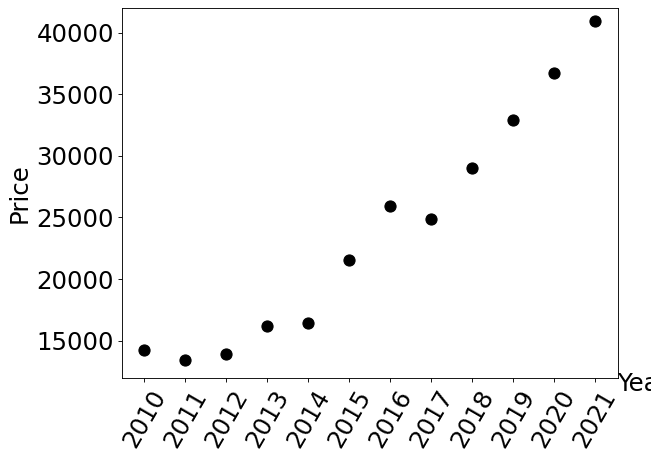

In [32]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(111)
ax.plot(price_df.index, price_data['Price'], 'ko', markersize=10)
ax.set_xlabel("Year")
ax.set_xticks(price_df.index)
ax.set_xticklabels(price_data['Year'], rotation=60)
ax.xaxis.set_label_coords(1.05, 0.015)
ax.set_ylabel("Price")
ax.set_ylim(12000, 42000)

从图形上看，房价大致与年份成线性关系，特别是2017年-2021年间。

因此，选用线性回归模型进行预测大体上是合理的。

### 最小二乘解

In [33]:
import torch

num_data = price_df.index.size
Xt = torch.stack(
    (torch.FloatTensor([x for x in range(num_data)]),
     torch.ones(num_data))
) # homogeneous coordinates
print(Xt)
X = torch.transpose(Xt, 0, 1)
y = torch.FloatTensor(price_data['Price']).reshape(num_data, 1) / 10000
print(f'{X}\n{Xt}\n{y}')

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])
tensor([[ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.],
        [ 3.,  1.],
        [ 4.,  1.],
        [ 5.,  1.],
        [ 6.,  1.],
        [ 7.,  1.],
        [ 8.,  1.],
        [ 9.,  1.],
        [10.,  1.],
        [11.,  1.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])
tensor([[1.4213],
        [1.3448],
        [1.3870],
        [1.6192],
        [1.6415],
        [2.1501],
        [2.5910],
        [2.4866],
        [2.8981],
        [3.2926],
        [3.6741],
        [4.0974]])


In [34]:
XtX = torch.mm(Xt, X)
print(XtX.shape)
Xty = torch.mm(Xt, y)
print(Xty.shape)
w = torch.mm(torch.inverse(XtX), Xty)
print(w.shape, w)
yh = torch.mm(X, w).reshape(num_data).detach().numpy() * 10000
print(yh)

torch.Size([2, 2])
torch.Size([2, 1])
torch.Size([2, 1]) tensor([[0.2556],
        [0.9777]])
[ 9776.665 12332.984 14889.303 17445.621 20001.941 22558.26  25114.58
 27670.898 30227.217 32783.535 35339.855 37896.176]


下面绘制拟合出的直线与原始数据进行对比

(12000.0, 42000.0)

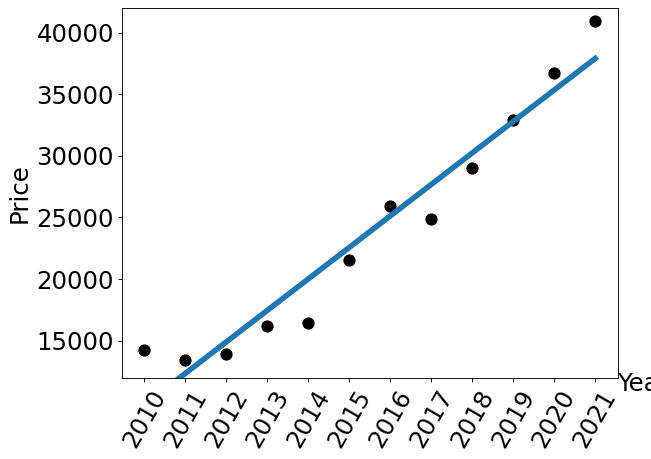

In [35]:
fig = plt.figure(figsize=(8, 6), dpi=80)

ax = fig.add_subplot(111)
ax.plot(price_df.index, price_data['Price'], 'ko', markersize=10)
ax.set_xlabel("Year")
ax.set_xticks(price_df.index)
ax.set_xticklabels(price_data['Year'], rotation=60)
ax.xaxis.set_label_coords(1.05, 0.015)
ax.set_ylabel("Price")
plt.plot(price_df.index, yh, linewidth=5.0)
ax.set_ylim(12000, 42000)

### 梯度下降法

In [36]:
import numpy as np

num_data = price_df.index.size
X = np.array([x for x in range(num_data)]).reshape(-1, 1)
y = np.array(price_data['Price']).reshape(num_data, 1) / 10000
print(f'{X}\n{y}')

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]
[[1.4213]
 [1.3448]
 [1.387 ]
 [1.6192]
 [1.6415]
 [2.1501]
 [2.591 ]
 [2.4866]
 [2.8981]
 [3.2926]
 [3.6741]
 [4.0974]]


In [37]:
class LinReg:
    X: np.array
    y: np.array
    
    def __init__(self, lr, X, y):
        self.X = X
        self.y = y
        self.w = np.random.rand(1)
        self.b = np.min(X)
        
    def linout(self, X):
        return np.sum(X * self.w + self.b, axis=1).reshape(-1, 1)
    
    def loss_sq(self):  
        return np.sum((self.linout(self.X) - self.y) ** 2 / 2, axis=0)

    def gd(self):
        def gradient(y_hat, y, X):
            return np.array(
                [np.sum((y_hat - y) * X, axis=0),
                 np.sum((y_hat - y), axis=0)
                ])
    
        y_hat = self.linout(self.X)
        grad = gradient(y_hat, self.y, self.X)
        self.w -= lr * grad[0]
        self.b -= lr * grad[1]

训练过程

In [38]:
lr = 0.001
num_epochs = 10
linreg = LinReg(lr, X, y)

for epoch in range(num_epochs):
    linreg.gd()
    print(f'epoch {epoch + 1}, loss {linreg.loss_sq()}')

epoch 1, loss [8.82258864]
epoch 2, loss [3.63495585]
epoch 3, loss [2.40415059]
epoch 4, loss [2.10543224]
epoch 5, loss [2.02632491]
epoch 6, loss [1.999005]
epoch 7, loss [1.98394141]
epoch 8, loss [1.97182224]
epoch 9, loss [1.96045367]
epoch 10, loss [1.94931859]


In [39]:
print(linreg.w, linreg.b)
yh_g = linreg.linout(X) * 10000
print(yh_g)

[0.38554847] [-0.00993622]
[[  -99.36217851]
 [ 3756.12249844]
 [ 7611.60717539]
 [11467.09185234]
 [15322.57652929]
 [19178.06120624]
 [23033.54588319]
 [26889.03056014]
 [30744.51523709]
 [34599.99991403]
 [38455.48459098]
 [42310.96926793]]


(12000.0, 42000.0)

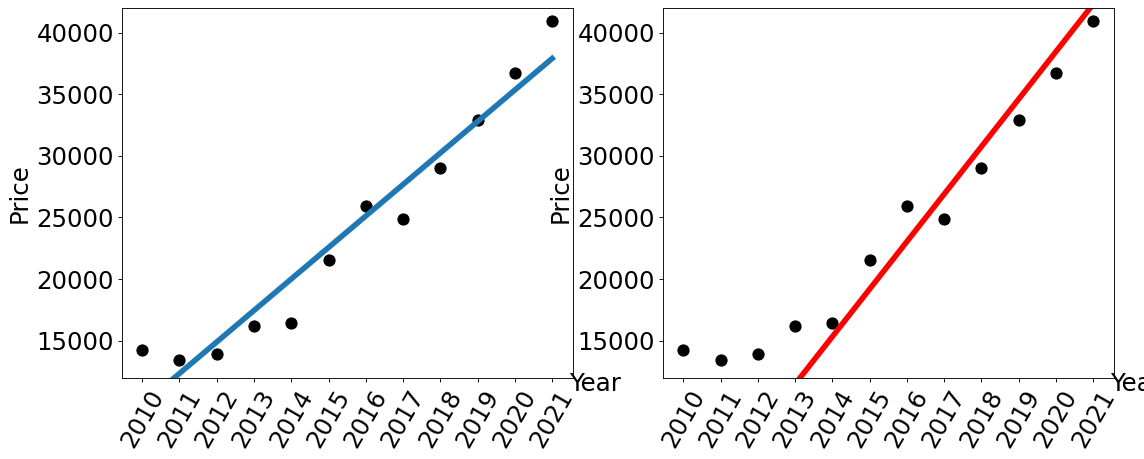

In [40]:
fig = plt.figure(figsize=(16, 6), dpi=80)

ax = fig.add_subplot(121)
ax.plot(price_df.index, price_data['Price'], 'ko', markersize=10)
ax.set_xlabel("Year")
ax.set_xticks(price_df.index)
ax.set_xticklabels(price_data['Year'], rotation=60)
ax.xaxis.set_label_coords(1.05, 0.015)
ax.set_ylabel("Price")
plt.plot(price_df.index, yh, linewidth=5.0)
ax.set_ylim(12000, 42000)

ax = fig.add_subplot(122)
ax.plot(price_df.index, price_data['Price'], 'ko', markersize=10)
ax.set_xlabel("Year")
ax.set_xticks(price_df.index)
ax.set_xticklabels(price_data['Year'], rotation=60)
ax.xaxis.set_label_coords(1.05, 0.015)
ax.set_ylabel("Price")
plt.plot(price_df.index, yh_g, 'r', linewidth=5.0)
ax.set_ylim(12000, 42000)


### 学习率测试

学习率的取值可以决定优化过程是否收敛。

- 尝试将学习率改成$0.03$并重新运行，观察误差的变化并解释原因

## 线性回归的从零开始实现

我们将从零开始实现整个方法，
包括数据流水线、模型、损失函数和小批量随机梯度下降优化器

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

根据带有噪声的线性模型构造一个人造数据集。
我们使用线性模型参数$\mathbf{w} = [2, -3.4]^\top$、$b = 4.2$
和噪声项$\epsilon$生成数据集及其标签：

$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon$$

In [2]:
def synthetic_data(w, b, num_examples):  
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

`features`中的每一行都包含一个二维数据样本，
`labels`中的每一行都包含一维标签值（一个标量）

In [3]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.9279, -0.3628]) 
label: tensor([1.5922])


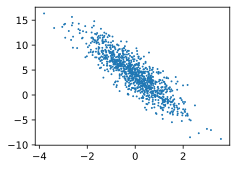

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

定义一个`data_iter`函数，
该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为`batch_size`的小批量

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 这些样本是随机读取的，没有特定的顺序
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.4983, -0.6839],
        [ 0.9086,  0.1984],
        [-0.9412,  1.7741],
        [ 0.5633,  0.5367],
        [-0.5475,  1.1045],
        [-0.4858,  0.1637],
        [-0.6546,  0.7451],
        [ 0.0917, -0.5540],
        [ 1.0365,  0.3422],
        [-1.3411,  1.1863]]) 
 tensor([[ 7.5235],
        [ 5.3381],
        [-3.7026],
        [ 3.5037],
        [-0.6498],
        [ 2.6669],
        [ 0.3536],
        [ 6.2596],
        [ 5.1234],
        [-2.5214]])


在我们开始用小批量随机梯度下降优化我们的模型参数之前
我们需要先有一些参数

In [7]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

定义模型，将模型的输入和参数同模型的输出关联起来

In [8]:
def linreg(X, w, b):  
    """线性回归模型"""
    return torch.matmul(X, w) + b

定义损失函数

In [9]:
def squared_loss(y_hat, y):  
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

定义优化算法

In [10]:
def sgd(params, lr, batch_size):  
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

训练过程

In [11]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。
        l.sum().backward()  # l中的所有元素被加到一起，并以此计算关于[w,b]的梯度
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.035369
epoch 2, loss 0.000128
epoch 3, loss 0.000051


比较真实参数和通过训练学到的参数来评估训练的成功程度

In [12]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0011, -0.0005], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0004], grad_fn=<RsubBackward1>)


## 线性回归的简洁实现

通过使用深度学习框架来简洁地实现线性回归模型

首先生成数据集

In [13]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

调用框架中现有的API来读取数据

In [14]:
def load_array(data_arrays, batch_size, is_train=True):  
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[-0.7491,  1.8152],
         [ 2.4920,  0.1592],
         [ 1.9233,  0.3220],
         [ 0.8503,  1.4565],
         [ 0.4859,  0.6209],
         [-0.9299, -1.5807],
         [ 1.8116,  1.2680],
         [ 0.7691,  0.2507],
         [ 0.8320, -0.9070],
         [ 0.5925,  0.2233]]),
 tensor([[-3.4789],
         [ 8.6513],
         [ 6.9465],
         [ 0.9517],
         [ 3.0479],
         [ 7.7058],
         [ 3.5047],
         [ 4.8805],
         [ 8.9502],
         [ 4.6297]])]

使用框架的预定义好的层

In [15]:
from torch import nn  # nn是神经网络的缩写

net = nn.Sequential(nn.Linear(2, 1))

初始化模型参数

In [16]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

计算均方误差使用的是`MSELoss`类，也称为平方$L_2$范数

In [17]:
loss = nn.MSELoss()

实例化一个`SGD`实例

In [18]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

训练过程代码与我们从零开始实现时所做的非常相似

In [19]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000356
epoch 2, loss 0.000104
epoch 3, loss 0.000105


比较生成数据集的真实参数和通过有限数据训练获得的模型参数

In [20]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([-0.0005,  0.0009])
b的估计误差： tensor([-0.0008])
